# Interactive Tutorial for the Hodgkin Huxley Model

This Jupyter notebook can be used to run simulations of a simple single neuron featuring ion channels which behave according to the Hodgkin Huxley model. The model relies on a basic equivalence between a biological membrane plus embedded ion channels, and an electrical circuit.

**To execute the notebook and generate the interactive widget below, click the double arrow (&#9654;&#9654;) above**

<font size="5">Parameters of the Model</font>

1) Membrane capacitance, $\mu{F}/cm^2$
2) Maximum Conductances, $mS/cm^2$
3) Reversal Potentials, $mV$
4) Simulation Parameters (time), $ms$
5) Injection Current, $(\mu{A}/cm^2)$


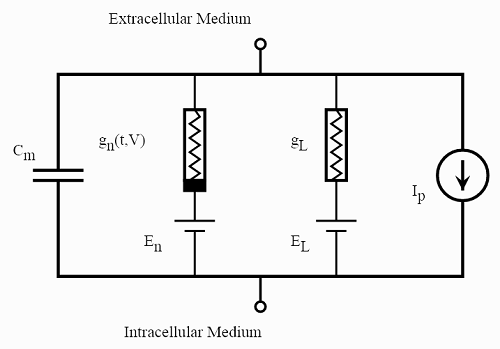

<font size="5">Execute the Hodgkin Huxley Model</font>

In [1]:
import ipywidgets
import ui_widget
from importlib.machinery import SourceFileLoader
%matplotlib ipympl
  
# imports the module from the given path
HHmodel = SourceFileLoader("HodgkinHuxley.py","../../Tutorial/Source/HodgkinHuxley.py").load_module()

#function to call python script as a module
def runHH(C_m, g_Na, g_K, g_L, E_Na, E_K, E_L, t_0, t_n, delta_t, I_inj_max, I_inj_width, I_inj_trans, vc_delay, vc_duration, vc_condVoltage, vc_testVoltage, vc_returnVoltage, runMode):
    ui_widget.highlight_slider()
    runner = HHmodel.HodgkinHuxley(C_m, g_Na, g_K, g_L, E_Na, E_K, E_L, t_0, t_n, delta_t, I_inj_max, I_inj_width, I_inj_trans, vc_delay, vc_duration, vc_condVoltage, vc_testVoltage, vc_returnVoltage, ui_widget.runMode)
    runner.Main()

#create plot area widget and interact with HHmodel
wid_plotArea=ipywidgets.interactive_output(runHH,{'C_m':ui_widget.slider_capacitance,
                                        'g_Na':ui_widget.slider_cond_Na, 'g_K':ui_widget.slider_cond_K, 'g_L':ui_widget.slider_cond_L, 
                                        'E_Na':ui_widget.slider_pot_Na, 'E_K':ui_widget.slider_pot_K, 'E_L':ui_widget.slider_pot_L,
                                        't_0':ui_widget.time_start, 't_n':ui_widget.time_end, 'delta_t':ui_widget.time_step, 
                                        'I_inj_max':ui_widget.slider_amplitude,'I_inj_width':ui_widget.slider_width,'I_inj_trans':ui_widget.slider_translation,
                                        'vc_delay':ui_widget.slider_delay,'vc_duration':ui_widget.slider_duration,'vc_condVoltage':ui_widget.slider_condVoltage,
                                        'vc_testVoltage':ui_widget.slider_testVoltage,'vc_returnVoltage':ui_widget.slider_returnVoltage,
                                        'runMode':ui_widget.runMode_togglebtns})
  
#display the widgets and plot area
display(ui_widget.modelInputs,wid_plotArea)

Output()

>**Note: Sign of channel current $I_{Na}$, $I_{K}$ and $I_{L}$ are opposite to NeuroML tutorial<br />**
The python code is interested in the current coming through the channel (so positive if flowing "out" like K, negative if flowing "in", like Na), whereas for the NeuroML channels (more specifically the channel density element) is what's flowing into the cell (so positive for Na).

<font size="5">Description of the Plots</font>

1) The top-most plot, shows **current injected into the cell membrane**. The amplitude, duration and delay of the injection current can be changed using the above sliders.

2) The second plot (the current/time plot) shows the influx (negative y-axis) and outflux (positive y-axis) of **ionic currents** passing through each type of ion channel being modeled.

3) The third plot shows the **activation/inactivation variables** of the ion channels in the neuron: activation variable m and inactivation variable h for *Na*, and activation variable n for *K*.

4) The bottom plot shows the **neural membrane potential activity**. The spikes here are called "action potentials". Outflux of *Na* directly followed by influx of *K* causes the spiking activity observed in the plot.
